# Problem 2: Dimensionality Reduction

## Part A: Load the Data

Load the data from `sample_dat.mat`. Compute the peristimulus time histogram (PSTH) of the data. Plot the PSTHs and note any trends. Now pre-process the data by using a Gaussian Process (GP) prior to smooth the data. A GP prior smooths the data by creating a correlation structure that makes nearby points in time have similar values. Specifically, if we treat each neuron’s PSTH as $x_n$, which is a $T$-dimensional vector, the prior distribution is $x_n \sim N(0, K)$, where the covariance matrix $K$ is defined as $K_{ij} = A \cdot e^{-(t_i-t_j)^2/l}$. Use the same approach as Problem 1 to get an estimate of the smoothed PSTH per neuron.

In [1]:
from sthom215_problem_2_ex_2 import *
import numpy as np
data = load_mat('sample_dat')
# (trial, neuron, spikes_per_bin)
mat = np.stack(list(data.values()), axis=0)

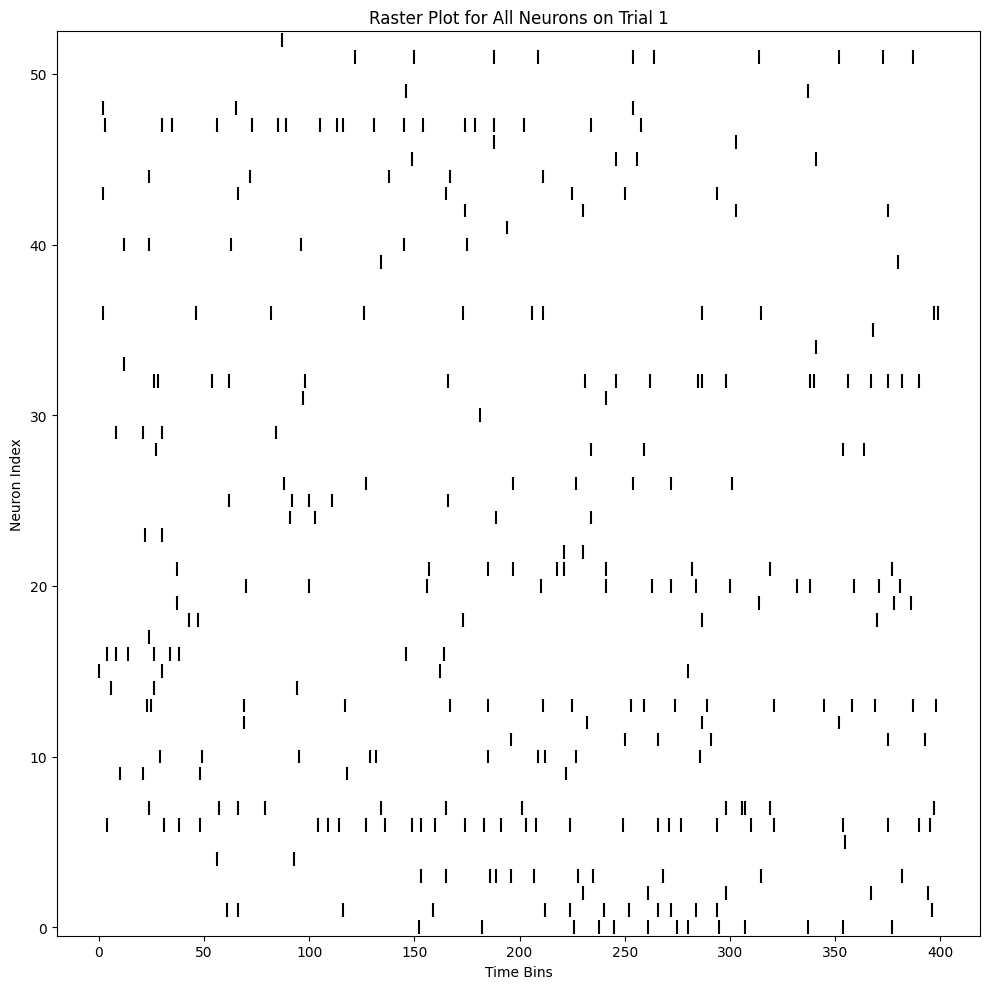

In [2]:
get_PSTH(1,dat=mat)

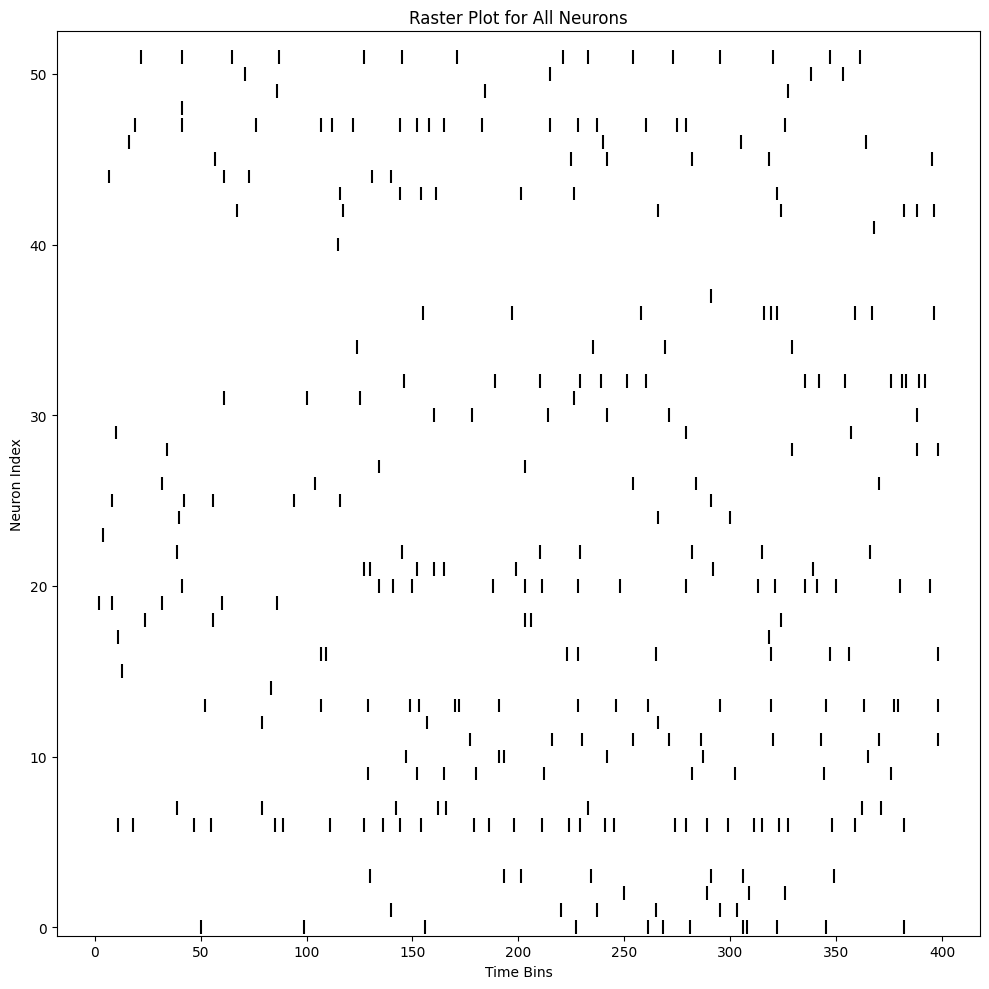

In [3]:
from sthom215_problem_2_ex_2 import smoothing
# test for single trial
trial1 = mat[0,:,:]
smooth_trial1 = smoothing(trial1, 1e-2, 1)
get_PSTH(dat=smooth_trial1)


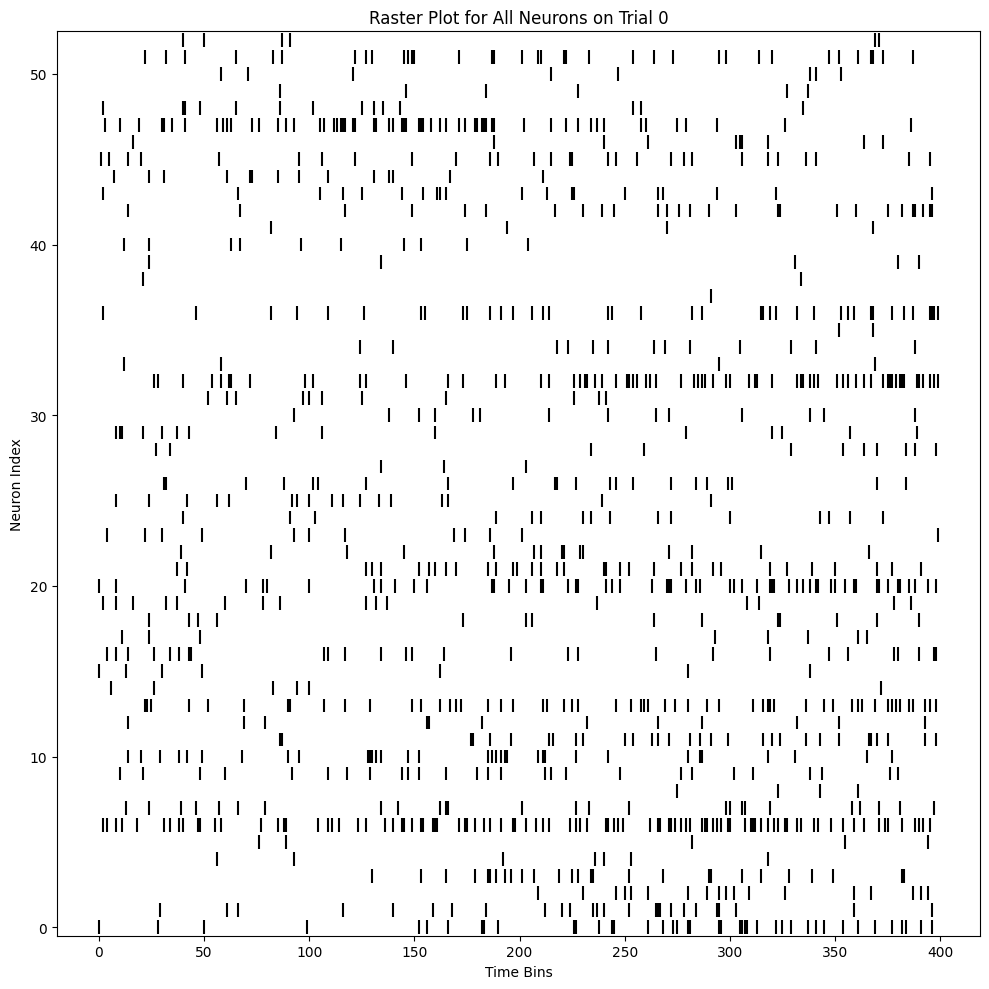

In [4]:
from sthom215_problem_2_ex_2 import smoothing
# smooth all trials
width  = 1e-1
smooth_mat = smoothing(mat, width, 1)
get_PSTH(0, dat=smooth_mat)

### Compare the two sets of PSTHs visually and remark on any details you notice. 



## Part B: Compute the Principal components

Compute the Principal components both with and without smoothing. Look at the temporal principal components. Specifically, plot (side-by-side) the top 3 components as a 3D line plot. 

* What do you notice?

After plotting the top 3 principle components side by side I notice that the plots look exactly the same. 


In [5]:
from sthom215_problem_2_ex_2 import pcaOverTime
import seaborn as sns
import matplotlib.pyplot as plt

trans_mat = pcaOverTime(mat)
trans_mat_smooth = pcaOverTime(smooth_mat)

plot_principal_components(3, trans_mat, trans_mat_smooth)


## Part C Look in the GPFA folder. 

Identify how to run GPFA by looking at the demo files included. Run GPFA on the data with a bin-size of 1ms (instead of the default 20ms). GPFA returs per-trial representations of neural activity. Use the function provided in the gpfa code directory plot3D to plot the time-courses for all of the trials. 

* What do you notice?

I notice that there is variablity across the trials as they are plotted but they all have the same basic shape and in particular, the initial trajectories appear to be rather similar. 

In [10]:
from sthom215_problem_2_ex_2 import *
from elephant.gpfa import GPFA
from neo import SpikeTrain
import quantities as pq
import numpy as np

# This should load your data
data = load_mat('sample_dat')  

# (trial, neuron, spikes_per_bin)
mat = np.stack(list(data.values()), axis=0)

bin_size = 1 * pq.ms
latent_dim = 3

spike_trains = create_SpikeTrain(mat)

# Initialize and fit GPFA
gpfa_3dim = GPFA(bin_size=bin_size, x_dim=latent_dim)
all_trajectories= gpfa_3dim.fit_transform(spike_trains)


Initializing parameters using factor analysis...

Fitting GPFA model...


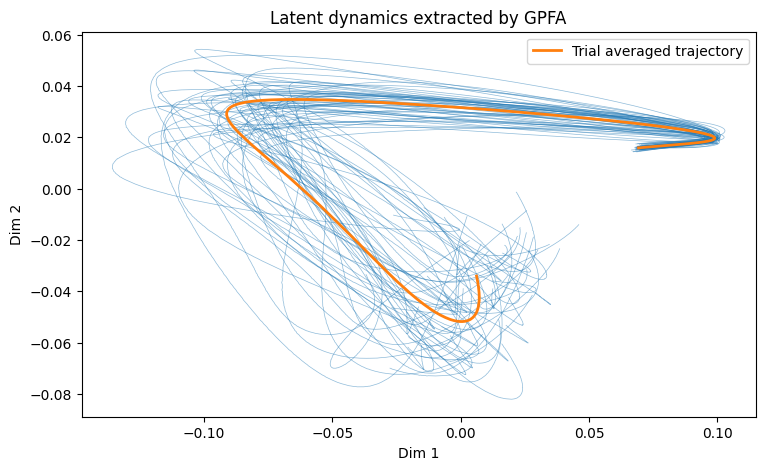

In [12]:
# Code from https://elephant.readthedocs.io/en/latest/tutorials/gpfa.html
linewidth_single_trial = 0.5
color_single_trial = 'C0'
alpha_single_trial = 0.5

linewidth_trial_average = 2
color_trial_average = 'C1'


f, ax1 = plt.subplots(1, 1, figsize=(15, 5))

ax1.set_title('Latent dynamics extracted by GPFA')
ax1.set_xlabel('Dim 1')
ax1.set_ylabel('Dim 2')
ax1.set_aspect(1)
for single_trial_trajectory in all_trajectories:
    ax1.plot(single_trial_trajectory[0], single_trial_trajectory[1], '-', lw=linewidth_single_trial, c=color_single_trial, alpha=alpha_single_trial)
average_trajectory = np.mean(all_trajectories, axis=0)
ax1.plot(average_trajectory[0], average_trajectory[1], '-', lw=linewidth_trial_average, c=color_trial_average, label='Trial averaged trajectory')
ax1.legend()

## Part D: Given trial-by-trial variability.
Given trial-by-trial variability,

* What do you think could be reasonable explanations for the observed deviations of the low-dimensional neural trajectory. 


* Pick one of these hypotheses and describe a theoretical way to test a prediction made by that hypothesis.